### Intalling libs

In [1]:
# pip install pydotplus

### Column description

| Variável 	| Descrição 	|
|:-:	|:-	|
| PassangerID 	| ID de identificação do passageiro(a) 	|
| Survived 	| se o passageiro(a) sobreviveu (0 = não, 1 = sim) 	|
| Pclass 	| classe do passageiro:<br>     * **1 = primeira**,<br>     * **2 = segunda**,<br>     * **3 = terceira** 	|
| name 	| nome do passageiro(a) 	|
| sex 	| sexo do passageiro(a) 	|
| age 	| idade do passageiro(a) 	|
| Sibsp 	| número de irmão(ãs)/esposo(a) à bordo 	|
| Parch 	| número de pais/filhos(as) à bordo 	|
| Ticket 	| número da passagem 	|
| Fare 	| preço da passagem 	|
| Cabin 	| cabine 	|
| Embarked 	| local que o passageiro(a) embarcou:<br>     * **C = Cherboug**,<br>     * **Q = Queenstown**,<br>     * **S = Southamption** 	|
| WikiId 	| ID de identificação do passageiro(a) segundo Wikipedia 	|
| Name_wiki 	| nome do passageiro(a) 	|
| Age_wiki 	| idade do passageiro(a) 	|
| Hometown 	| cidade de nascimento do passageiro(a) 	|
| Boarded 	| cidade de embarque 	|
| Destination 	| destino da viagem 	|
| Lifeboat 	| identificação do bote salva-vidas 	|
| Body 	| número de identificação do corpo 	|


<font color='red'>**IMPORTANT**</font>

The new features (the ones after 'Embarked') are very similar to the original ones but they are more up-to-date and have much fewer missing values. Therefore, users can decide on the preferred features themselves.

### Importing Libs

In [8]:
# data visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import (
    jointplot,
    pairplot,
    boxplot,
    heatmap
)

from yellowbrick.features import (
    Rank2D, 
    RadViz,
    FeatureImportances,
    ParallelCoordinates,
    JointPlotVisualizer,
)

import dtreeviz

import pydotplus

from io import(
    StringIO
)

from IPython.display import (
    Image
)

# data manipulation
import numpy as np
import pandas as pd
from pandas.plotting import(
    radviz
)
import janitor as jn

from ydata_profiling import ProfileReport

# missing values
import missingno as msno

from sklearn.impute import (
    SimpleImputer
)

# machine learning models
from sklearn import (
    ensemble,
    preprocessing,
    tree,
    impute,
    model_selection
)

from sklearn.utils import (
    resample
)

from sklearn.dummy import (
    DummyClassifier
)

from sklearn.model_selection import (
    train_test_split
)

from sklearn.experimental import (
    enable_iterative_imputer
)

from sklearn.linear_model import (
    LogisticRegression
)

from sklearn.naive_bayes import (
    GaussianNB
)

from sklearn.tree import (
    DecisionTreeClassifier,
    export_graphviz,
    plot_tree
)

from sklearn.neighbors import (
    KNeighborsClassifier
)

from sklearn.naive_bayes import (
    GaussianNB
)

from sklearn.svm import (
    SVC
)

from sklearn.ensemble import (
    RandomForestClassifier
)

from imblearn.over_sampling import (
    RandomOverSampler,
)

import rfpimp

import lightgbm as lgb

import xgboost as xgb

import xgbfir

# data model metrics
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score
)

from yellowbrick.classifier import (
    ConfusionMatrix
)

from yellowbrick.model_selection import (
    LearningCurve,
    ValidationCurve
)

# data prep-model
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    learning_curve
)

# model deploy
import pickle

### Reading the Titanic Dataset

In [3]:
df = pd.read_csv("titanic_dataset.csv", index_col=0)
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


### Deleting _Class_ feature at the end
We are deleting because is the same as _pclass_ (same result, same data)

In [4]:
df = df.drop('Class', axis = 'columns')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body
PassengerId,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB


### Converting DataFrame Column Names to Lowercase snakecase

In [5]:
df.columns = (df.columns
                .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                .str.lower()
             )

df

,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,wiki_id,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,body
PassengerId,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB


### Preparing the dataset

In [6]:
# dropping columns taht do not add value
df = df.drop(columns = ['name',
                        'name_wiki',
                        'wiki_id',
                        'hometown',
                        'destination',
                        'ticket',
                        'lifeboat',
                        'body',
                        'cabin',
                        'age'])

# using get_dummies function to convert object to int
df = pd.get_dummies(df)

# dropping redundant features
df = df.drop(columns = ['sex_male'])

#remove rows with any values that are not finite (NaN or infite)
df = df[np.isfinite(df).all(1)]

# first, we need to create a series of the target feature
y = df.survived

# then, we create a DataFrame with the attributes
X = df.drop(columns = ['survived'])

# using the scikit-learn to split 30% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
X.isnull().sum()

pclass                 0
sib_sp                 0
parch                  0
fare                   0
age_wiki               0
sex_female             0
embarked_C             0
embarked_Q             0
embarked_S             0
boarded_Belfast        0
boarded_Cherbourg      0
boarded_Queenstown     0
boarded_Southampton    0
dtype: int64

### Model Selection
The model selection module is focused on hyperparameter optimization. We will address the *validation curve* and the *learning curve*

### Validation Curve
Creating a *validation curve* is a way to determine an appropriate value for a hyperparameter. A *validation curve* is a graph that shows how model performance responds to changes in hyperparameter value.<br><br>
The generated graph returns both training and validation data. Validation data scores allow us to infer how the model would respond to previously unseen data. In general, we choose a hyperparameter that maximizes the validation data score.

#### Using Yellowbrick lib
In the following example, we will evaluate whether a modification to the *max_depth* value changes the performance of a random forest model.
- we can provide a *scoring* parameter defined with a metric from a scikit-learn model (by default, *accuracy* is used)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

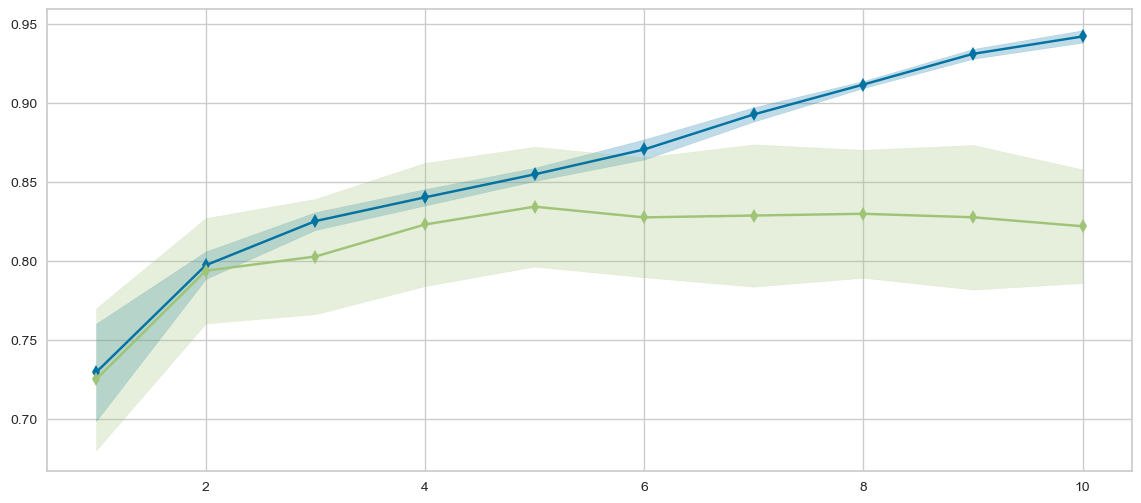

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))

vc_viz = ValidationCurve(
    RandomForestClassifier(n_estimators=100),
    param_name="max_depth",
    param_range=np.arange(1, 11),
    cv=10,
    n_jobs=-1
)

vc_viz.fit(X, y)

fig.savefig("images/validation_curve_yellowbrick")

The **ValidationCurve** class accepts a *scoring* parameter. The parameter can be a custom function or one of the following options:
- scoring options for classification:
    - *accuracy*, *average_precision*, *f1*, *f1_micro*, *f1_macro*, *f1_weighted*, *f1_samples*, *neg_log_loss*, *precision*, *recall*, *rec_auc*
- scoring options for clustering:
    - adjusted_mutual_info_score, adjusted_rand_score, completeness_score, fowlkesmallows_score, homogeinity_score, mutual_info_score, normalized_mutual_info_score, and v_measure_score